In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
# load data, parse date
training=pd.read_csv('training_set_VU_DM_2014.csv', parse_dates=['date_time'])

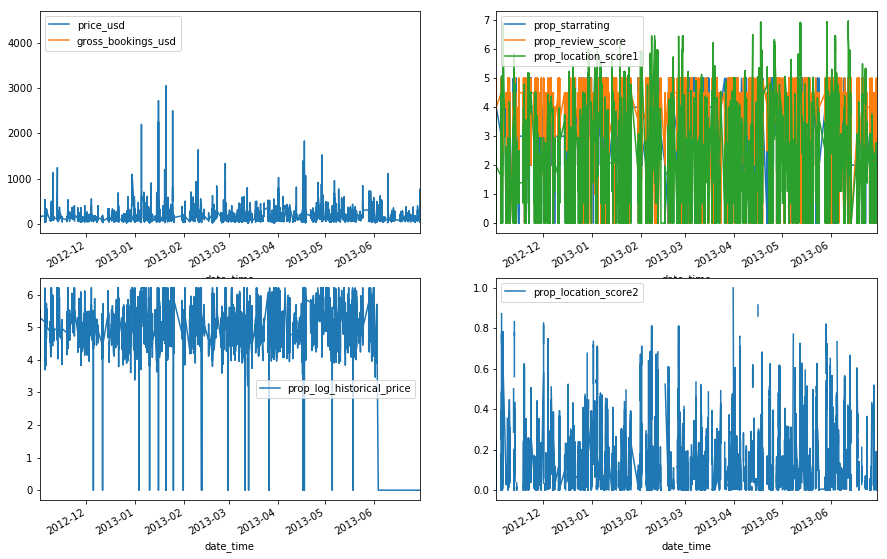

In [10]:
# datetime histogram of prices & scores
plt.rcParams["figure.figsize"]=[15,10]
fig, axes = plt.subplots(nrows=2, ncols=2)
size=10000
training[:size].plot(x='date_time',y='price_usd',ax=axes[0,0])
training[:size].plot(x='date_time',y='gross_bookings_usd',ax=axes[0,0])

training[:size].plot(x='date_time',y='prop_starrating',ax=axes[0,1])
training[:size].plot(x='date_time',y='prop_review_score',ax=axes[0,1])
training[:size].plot(x='date_time',y='prop_location_score1',ax=axes[0,1])

training[:size].plot(x='date_time',y='prop_log_historical_price',ax=axes[1,0])

training[:size].plot(x='date_time',y='prop_location_score2',ax=axes[1,1]);

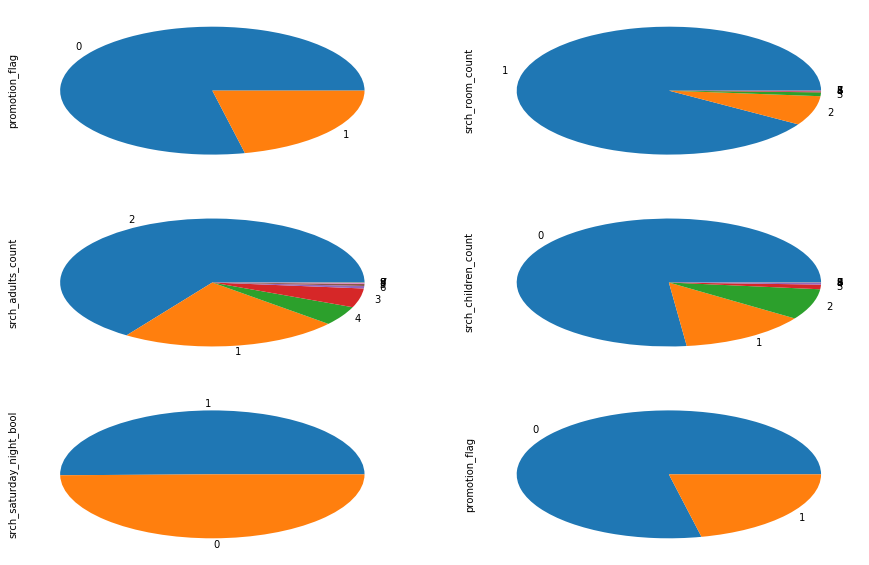

In [7]:
# plot bools
plt.rcParams["figure.figsize"]=[15,10]
fig, axes = plt.subplots(nrows=3, ncols=2)

training.promotion_flag.value_counts().plot.pie(ax=axes[0,0])
training.srch_room_count.value_counts().plot.pie(ax=axes[0,1])
training.srch_adults_count.value_counts().plot.pie(ax=axes[1,0])
training.srch_children_count.value_counts().plot.pie(ax=axes[1,1])
training.srch_saturday_night_bool.value_counts().plot.pie(ax=axes[2,0])
training.promotion_flag.value_counts().plot.pie(ax=axes[2,1]);

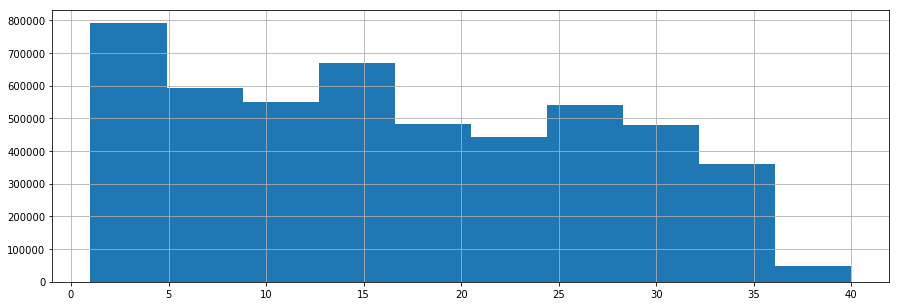

In [49]:
training.position.hist()

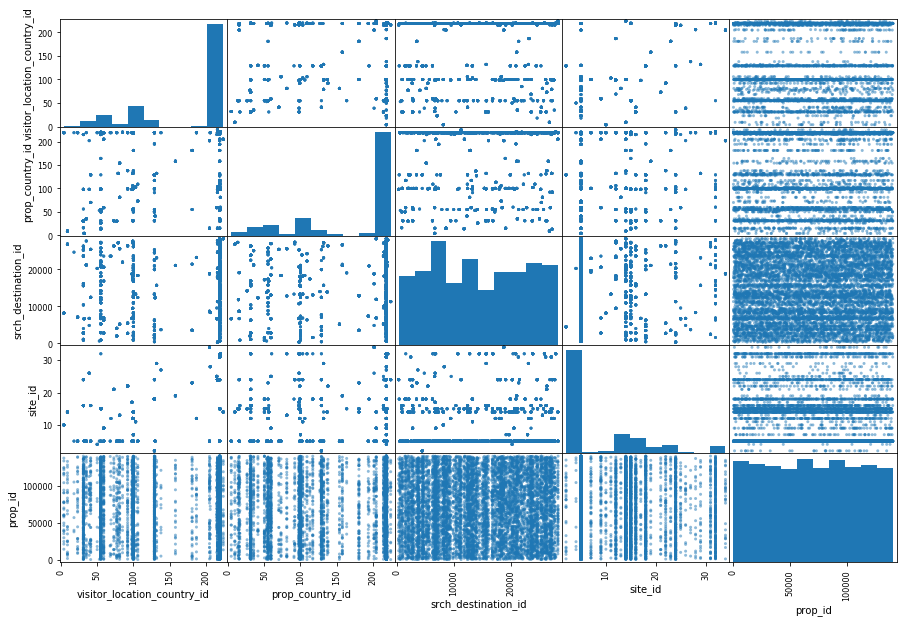

In [17]:
# compare the IDs
plt.rcParams["figure.figsize"]=[15,10]
scatter_matrix(training[:size][['visitor_location_country_id','prop_country_id','srch_destination_id','site_id','prop_id']]);

In [12]:
# Correlation between visitor & property country id
training.visitor_location_country_id.corr(training.prop_country_id)

0.48278697988865854

In [55]:
# feature engineering
gross=training[training['gross_bookings_usd'].notnull()]
# tax = gross - ( price * nights )
gross['tax']=gross.gross_bookings_usd-(gross.price_usd*gross.srch_length_of_stay)
gross[gross['tax']>0].groupby('prop_country_id').mean()['tax'].sort_values(ascending=False).head()

/Users/theofpa/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


prop_country_id
153    1046.798214
149     882.218437
16      842.865909
34      795.761429
156     653.755500
Name: tax, dtype: float64